In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/final_df.csv")
df.head()

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0


In [5]:
df.drop(columns=['ReviewText',"Gender","Preferences","Email"],inplace=True)

In [6]:
df.head()

,ReviewID,DestinationID_x,UserID,Rating,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,1,1
1,2,411,783,1,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,1,1
2,4,358,959,3,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,1,1
3,5,989,353,2,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,2,0
4,6,473,408,4,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReviewID          993 non-null    int64  
 1   DestinationID_x   993 non-null    int64  
 2   UserID            993 non-null    int64  
 3   Rating            993 non-null    int64  
 4   Name_x            993 non-null    object 
 5   State             993 non-null    object 
 6   Type              993 non-null    object 
 7   Popularity        993 non-null    float64
 8   BestTimeToVisit   993 non-null    object 
 9   HistoryID         993 non-null    int64  
 10  DestinationID_y   993 non-null    int64  
 11  VisitDate         993 non-null    object 
 12  ExperienceRating  993 non-null    int64  
 13  Name_y            993 non-null    object 
 14  NumberOfAdults    993 non-null    int64  
 15  NumberOfChildren  993 non-null    int64  
dtypes: float64(1), int64(9), object(6)
memory us

In [8]:
df.describe()

,ReviewID,DestinationID_x,UserID,Rating,Popularity,HistoryID,DestinationID_y,ExperienceRating,NumberOfAdults,NumberOfChildren
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,484.800604,504.341390,513.140987,3.078550,8.483005,493.905337,490.703927,3.023162,1.527694,1.001007
std,278.241378,289.038013,286.965858,1.390446,0.560674,295.013790,294.133855,1.412240,0.499484,0.829763
min,1.000000,2.000000,2.000000,1.000000,7.505629,2.000000,3.000000,1.000000,1.000000,0.000000
25%,254.000000,261.000000,261.000000,2.000000,8.015627,243.000000,239.000000,2.000000,1.000000,0.000000
50%,463.000000,500.000000,524.000000,3.000000,8.494824,475.000000,463.000000,3.000000,2.000000,1.000000
75%,715.000000,746.000000,777.000000,4.000000,8.956459,751.000000,753.000000,4.000000,2.000000,2.000000
max,997.000000,1000.000000,999.000000,5.000000,9.484798,999.000000,1000.000000,5.000000,2.000000,2.000000


In [9]:
# quick look
print(df.shape)
print(df.columns.tolist())
display(df.head())

print(df.isnull().sum())
df['VisitDate'] = pd.to_datetime(df['VisitDate'], errors='coerce')

print("VisitDate parse nulls:", df['VisitDate'].isnull().sum())

numeric_cols = ['Rating','Popularity','ExperienceRating','NumberOfAdults','NumberOfChildren']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')


df = df.dropna(axis=0, how='any')
print("After dropna:", df.shape)


(993, 16)
['ReviewID', 'DestinationID_x', 'UserID', 'Rating', 'Name_x', 'State', 'Type', 'Popularity', 'BestTimeToVisit', 'HistoryID', 'DestinationID_y', 'VisitDate', 'ExperienceRating', 'Name_y', 'NumberOfAdults', 'NumberOfChildren']


,ReviewID,DestinationID_x,UserID,Rating,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,1,1
1,2,411,783,1,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,1,1
2,4,358,959,3,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,1,1
3,5,989,353,2,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,2,0
4,6,473,408,4,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,2,0


ReviewID            0
DestinationID_x     0
UserID              0
Rating              0
Name_x              0
State               0
Type                0
Popularity          0
BestTimeToVisit     0
HistoryID           0
DestinationID_y     0
VisitDate           0
ExperienceRating    0
Name_y              0
NumberOfAdults      0
NumberOfChildren    0
dtype: int64
VisitDate parse nulls: 0
After dropna: (993, 16)


In [10]:
print(df[numeric_cols].describe().transpose())
categorical_cols = ['State', 'Type', 'BestTimeToVisit', 'Name_x', 'Name_y']
for c in categorical_cols:
    print(f"\nTop values for {c}:")
    print(df[c].value_counts().head(10))


                  count      mean       std       min       25%       50%  \
Rating            993.0  3.078550  1.390446  1.000000  2.000000  3.000000   
Popularity        993.0  8.483005  0.560674  7.505629  8.015627  8.494824   
ExperienceRating  993.0  3.023162  1.412240  1.000000  2.000000  3.000000   
NumberOfAdults    993.0  1.527694  0.499484  1.000000  1.000000  2.000000   
NumberOfChildren  993.0  1.001007  0.829763  0.000000  0.000000  1.000000   

                       75%       max  
Rating            4.000000  5.000000  
Popularity        8.956459  9.484798  
ExperienceRating  4.000000  5.000000  
NumberOfAdults    2.000000  2.000000  
NumberOfChildren  2.000000  2.000000  

Top values for State:
State
Jammu and Kashmir    222
Uttar Pradesh        206
Rajasthan            201
Kerala               192
Goa                  172
Name: count, dtype: int64

Top values for Type:
Type
Adventure     222
Historical    206
City          201
Nature        192
Beach         172
Name: 

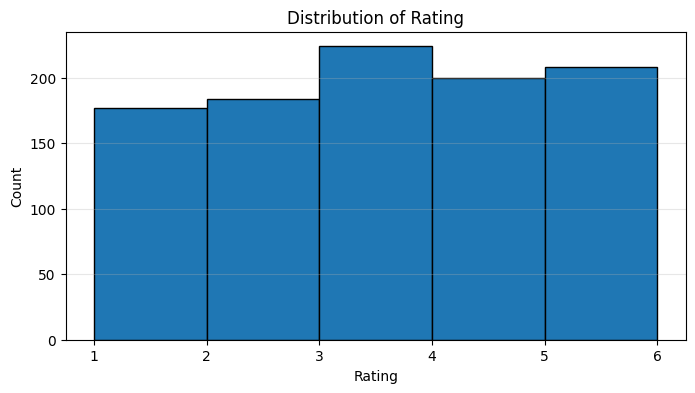

In [11]:
plt.figure(figsize=(8,4))
plt.hist(df['Rating'], bins=range(int(df['Rating'].min()), int(df['Rating'].max())+2), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.grid(axis='y', alpha=0.3)
plt.show()


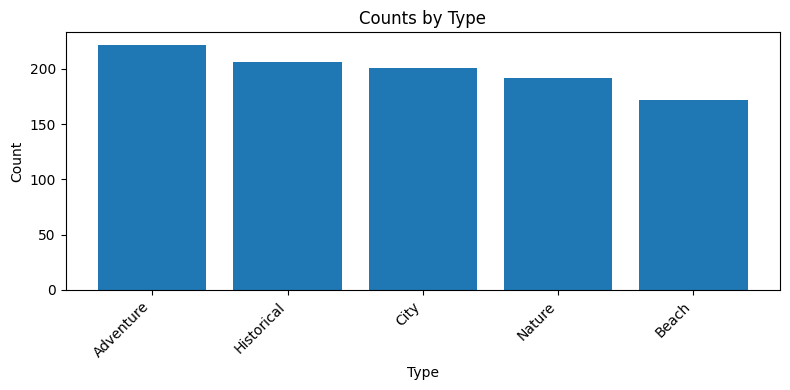

In [12]:
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8,4))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Counts by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3883072590.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=types, showfliers=False)


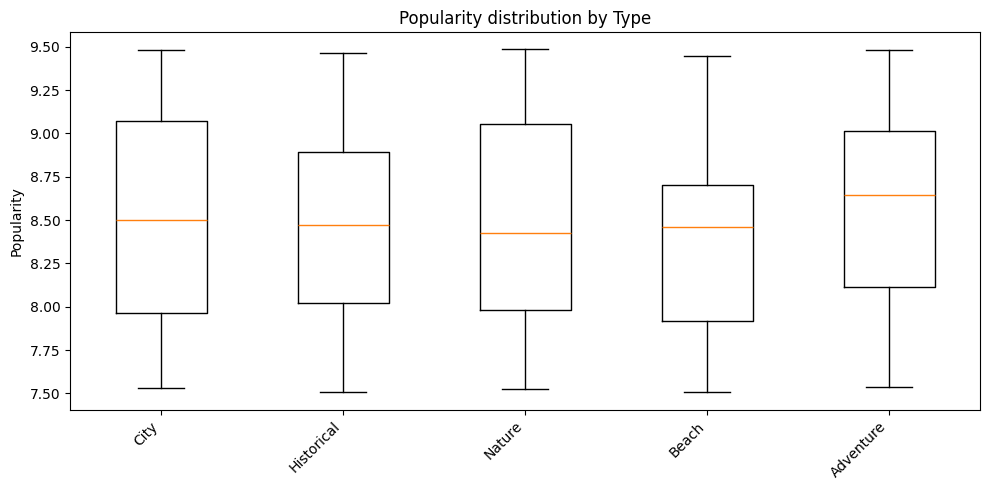

In [13]:
plt.figure(figsize=(10,5))
types = df['Type'].unique()
data_to_plot = [df.loc[df['Type']==t, 'Popularity'].dropna() for t in types]
plt.boxplot(data_to_plot, labels=types, showfliers=False)
plt.ylabel('Popularity')
plt.title('Popularity distribution by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


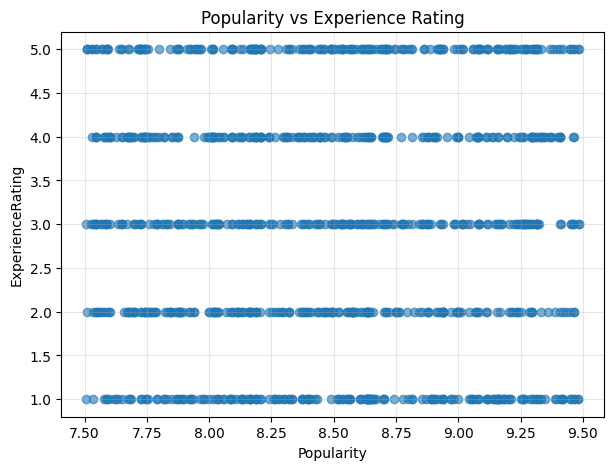

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(df['Popularity'], df['ExperienceRating'], alpha=0.6)
plt.xlabel('Popularity')
plt.ylabel('ExperienceRating')
plt.title('Popularity vs Experience Rating')
plt.grid(alpha=0.3)
plt.show()


/tmp/ipython-input-1613642788.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_time.resample('M').size()


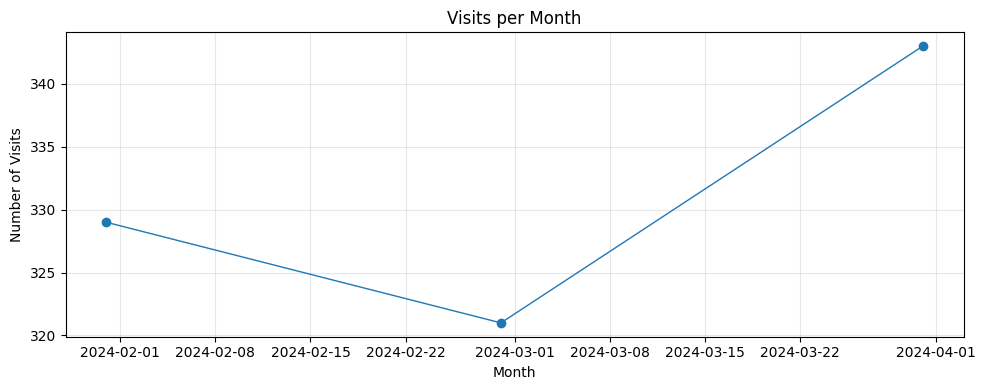

In [15]:
# Ensure VisitDate is datetime
df_time = df.copy()
df_time.set_index('VisitDate', inplace=True)
monthly = df_time.resample('M').size()

plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly.values, marker='o', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.title('Visits per Month')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


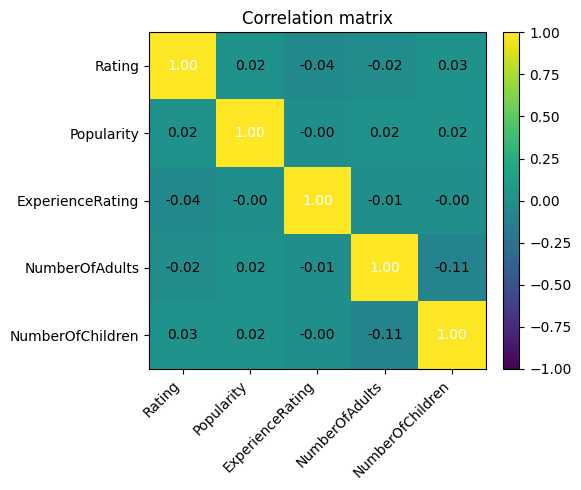

In [16]:
corr_cols = ['Rating','Popularity','ExperienceRating','NumberOfAdults','NumberOfChildren']
corr = df[corr_cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha='right')
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title('Correlation matrix')
# Annotate values
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='white' if abs(corr.iloc[i,j])>0.5 else 'black')
plt.tight_layout()
plt.show()


In [17]:
cat_to_encode = ['State', 'Type', 'BestTimeToVisit']
df_encoded = pd.get_dummies(df, columns=cat_to_encode, drop_first=False)  # drop_first=True avoids dummy trap if needed
print("New shape after one-hot:", df_encoded.shape)


New shape after one-hot: (993, 28)


In [18]:
top_names = df['Name_x'].value_counts().nlargest(10).index
df['Name_x_top10'] = df['Name_x'].where(df['Name_x'].isin(top_names), other='Other')
df = pd.get_dummies(df, columns=['Name_x_top10'], prefix='Name', drop_first=False)


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = ['Rating','Popularity','ExperienceRating','NumberOfAdults','NumberOfChildren']

scaler_std = StandardScaler()
df_encoded_std = df_encoded.copy()
df_encoded_std[num_cols] = scaler_std.fit_transform(df_encoded_std[num_cols])
print("Standard scaled sample:")
print(df_encoded_std[num_cols].describe().transpose())

scaler_mm = MinMaxScaler()
df_encoded_mm = df_encoded.copy()
df_encoded_mm[num_cols] = scaler_mm.fit_transform(df_encoded_mm[num_cols])
print("MinMax scaled sample (0-1):")
print(df_encoded_mm[num_cols].describe().transpose())


Standard scaled sample:
                  count          mean       std       min       25%       50%  \
Rating            993.0 -1.788879e-17  1.000504 -1.495633 -0.776077 -0.056521   
Popularity        993.0  2.075100e-16  1.000504 -1.744095 -0.834020  0.021091   
ExperienceRating  993.0 -1.967767e-16  1.000504 -1.433312 -0.724861 -0.016409   
NumberOfAdults    993.0  2.647541e-16  1.000504 -1.057010 -1.057010  0.946065   
NumberOfChildren  993.0  2.414987e-17  1.000504 -1.206985 -1.206985 -0.001214   

                       75%       max  
Rating            0.663035  1.382591  
Popularity        0.844864  1.787666  
ExperienceRating  0.692042  1.400494  
NumberOfAdults    0.946065  0.946065  
NumberOfChildren  1.204556  1.204556  
MinMax scaled sample (0-1):
                  count      mean       std  min       25%       50%      75%  \
Rating            993.0  0.519637  0.347611  0.0  0.250000  0.500000  0.75000   
Popularity        993.0  0.493831  0.283288  0.0  0.257683  0.499

In [21]:
df_encoded_std.to_csv('processed_data_standard_scaled.csv', index=False)

df_encoded_mm.to_csv('processed_data_minmax_scaled.csv', index=False)


In [22]:
df.head()

,ReviewID,DestinationID_x,UserID,Rating,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,...,VisitDate,ExperienceRating,Name_y,NumberOfAdults,NumberOfChildren,Name_Goa Beaches,Name_Jaipur City,Name_Kerala Backwaters,Name_Leh Ladakh,Name_Taj Mahal
0,1,178,327,2,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,...,2024-01-01,3,Pooja,1,1,False,True,False,False,False
1,2,411,783,1,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,...,2024-03-20,2,Karan,1,1,False,False,False,False,True
2,4,358,959,3,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,...,2024-02-15,4,Ritvik,1,1,False,True,False,False,False
3,5,989,353,2,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,...,2024-01-01,5,Isha,2,0,False,False,True,False,False
4,6,473,408,4,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,...,2024-01-01,2,Ishaan,2,0,False,True,False,False,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ReviewID                993 non-null    int64         
 1   DestinationID_x         993 non-null    int64         
 2   UserID                  993 non-null    int64         
 3   Rating                  993 non-null    int64         
 4   Name_x                  993 non-null    object        
 5   State                   993 non-null    object        
 6   Type                    993 non-null    object        
 7   Popularity              993 non-null    float64       
 8   BestTimeToVisit         993 non-null    object        
 9   HistoryID               993 non-null    int64         
 10  DestinationID_y         993 non-null    int64         
 11  VisitDate               993 non-null    datetime64[ns]
 12  ExperienceRating        993 non-null    int64     

In [26]:
df.drop(columns=["Name_x"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ReviewID                993 non-null    int64         
 1   DestinationID_x         993 non-null    int64         
 2   UserID                  993 non-null    int64         
 3   Rating                  993 non-null    int64         
 4   Type                    993 non-null    object        
 5   Popularity              993 non-null    float64       
 6   BestTimeToVisit         993 non-null    object        
 7   HistoryID               993 non-null    int64         
 8   DestinationID_y         993 non-null    int64         
 9   VisitDate               993 non-null    datetime64[ns]
 10  ExperienceRating        993 non-null    int64         
 11  NumberOfAdults          993 non-null    int64         
 12  NumberOfChildren        993 non-null    int64     

In [27]:
df = pd.get_dummies(df, columns=['Type', 'BestTimeToVisit'], drop_first=False)

In [28]:
df.head()

,ReviewID,DestinationID_x,UserID,Rating,Popularity,HistoryID,DestinationID_y,VisitDate,ExperienceRating,NumberOfAdults,...,Type_Adventure,Type_Beach,Type_City,Type_Historical,Type_Nature,BestTimeToVisit_Apr-Jun,BestTimeToVisit_Nov-Feb,BestTimeToVisit_Nov-Mar,BestTimeToVisit_Oct-Mar,BestTimeToVisit_Sep-Mar
0,1,178,327,2,8.544352,79,175,2024-01-01,3,1,...,False,False,True,False,False,False,False,False,True,False
1,2,411,783,1,8.284127,834,894,2024-03-20,2,1,...,False,False,False,True,False,False,True,False,False,False
2,4,358,959,3,7.738761,998,660,2024-02-15,4,1,...,False,False,True,False,False,False,False,False,True,False
3,5,989,353,2,8.208088,202,894,2024-01-01,5,2,...,False,False,False,False,True,False,False,False,False,True
4,6,473,408,4,8.138558,331,403,2024-01-01,2,2,...,False,False,True,False,False,False,False,False,True,False


In [29]:
df['VisitDate'] = pd.to_datetime(df['VisitDate'])

df['Year'] = df['VisitDate'].dt.year
df['Month'] = df['VisitDate'].dt.month
df['Day'] = df['VisitDate'].dt.day
df['DayOfWeek'] = df['VisitDate'].dt.dayofweek

In [32]:
df=df.drop(columns=['VisitDate'])

In [33]:
df.head()

,ReviewID,DestinationID_x,UserID,Rating,Popularity,HistoryID,DestinationID_y,ExperienceRating,NumberOfAdults,NumberOfChildren,...,Type_Nature,BestTimeToVisit_Apr-Jun,BestTimeToVisit_Nov-Feb,BestTimeToVisit_Nov-Mar,BestTimeToVisit_Oct-Mar,BestTimeToVisit_Sep-Mar,Year,Month,Day,DayOfWeek
0,1,178,327,2,8.544352,79,175,3,1,1,...,False,False,False,False,True,False,2024,1,1,0
1,2,411,783,1,8.284127,834,894,2,1,1,...,False,False,True,False,False,False,2024,3,20,2
2,4,358,959,3,7.738761,998,660,4,1,1,...,False,False,False,False,True,False,2024,2,15,3
3,5,989,353,2,8.208088,202,894,5,2,0,...,True,False,False,False,False,True,2024,1,1,0
4,6,473,408,4,8.138558,331,403,2,2,0,...,False,False,False,False,True,False,2024,1,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReviewID                 993 non-null    int64  
 1   DestinationID_x          993 non-null    int64  
 2   UserID                   993 non-null    int64  
 3   Rating                   993 non-null    int64  
 4   Popularity               993 non-null    float64
 5   HistoryID                993 non-null    int64  
 6   DestinationID_y          993 non-null    int64  
 7   ExperienceRating         993 non-null    int64  
 8   NumberOfAdults           993 non-null    int64  
 9   NumberOfChildren         993 non-null    int64  
 10  Name_Goa Beaches         993 non-null    bool   
 11  Name_Jaipur City         993 non-null    bool   
 12  Name_Kerala Backwaters   993 non-null    bool   
 13  Name_Leh Ladakh          993 non-null    bool   
 14  Name_Taj Mahal           9

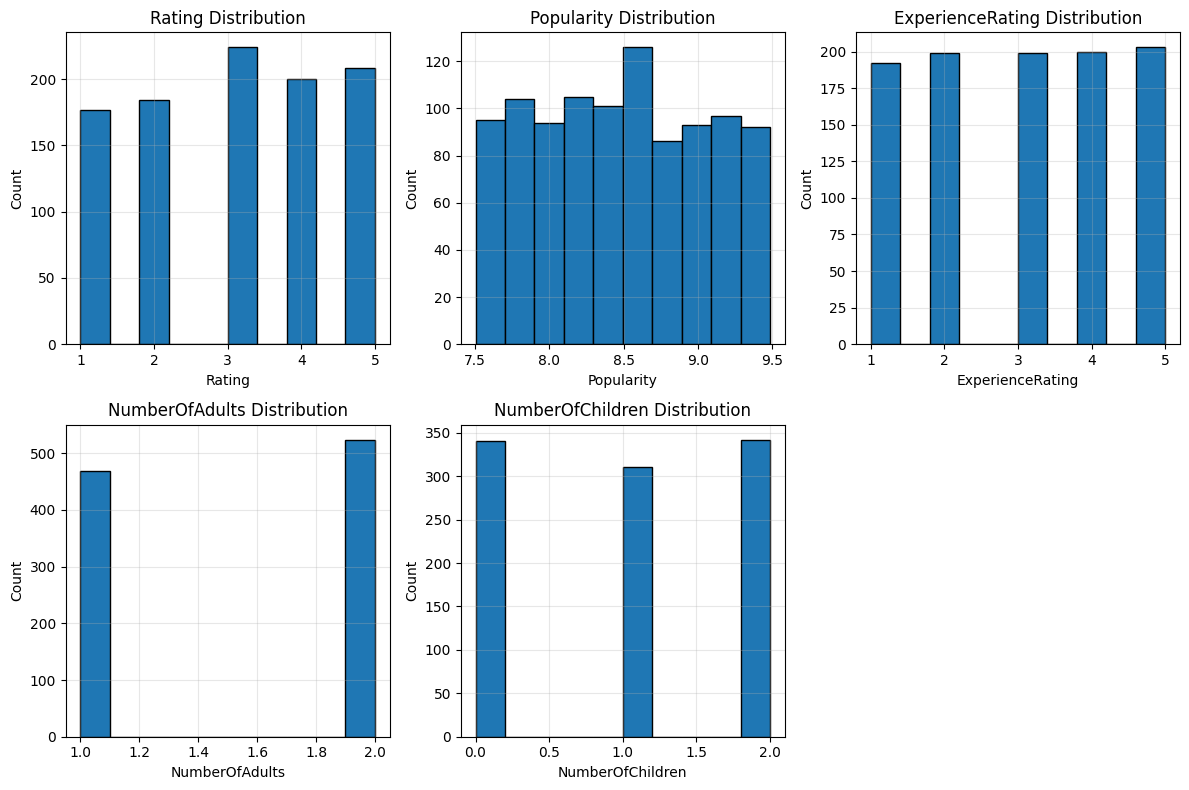

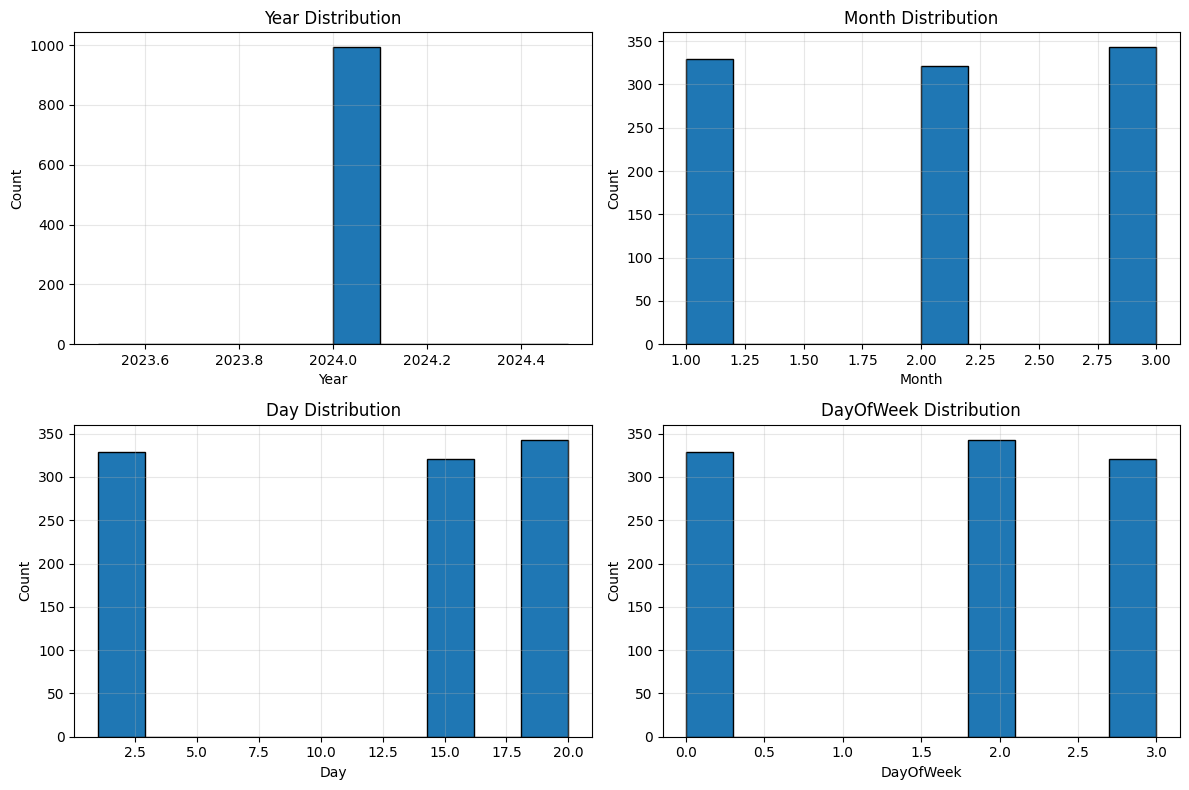

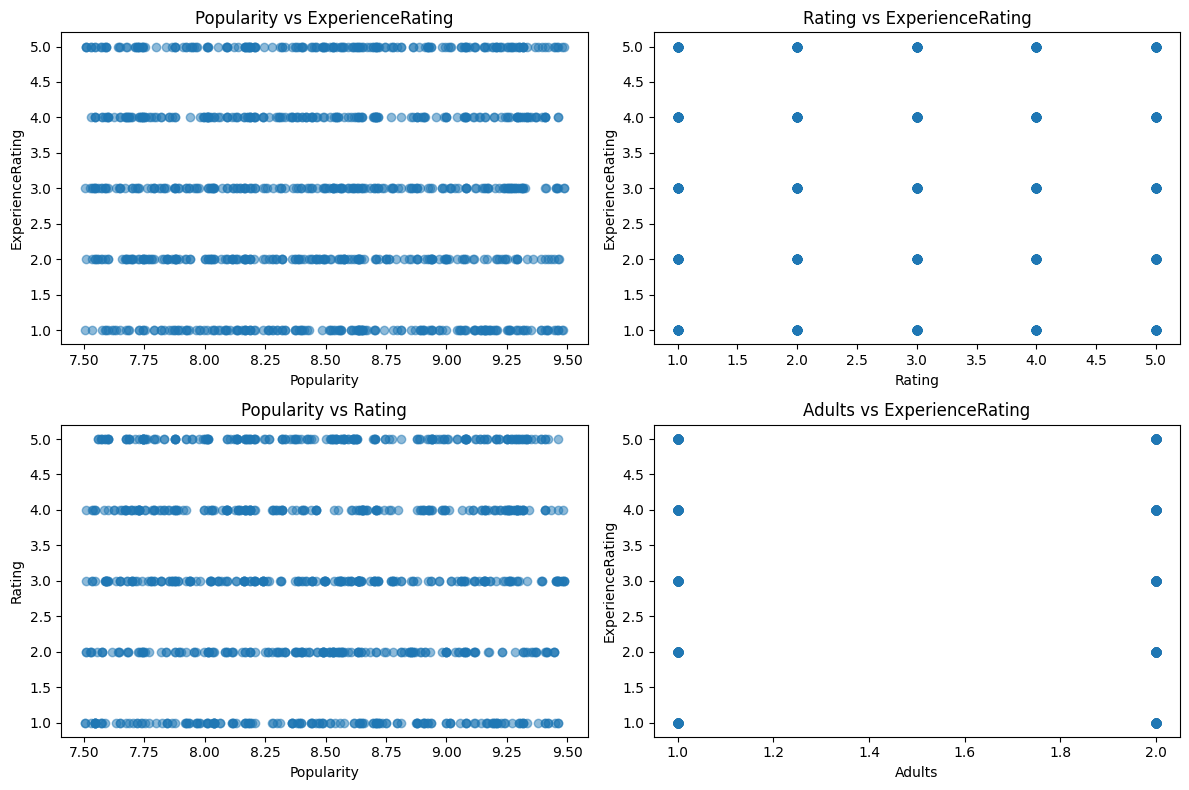

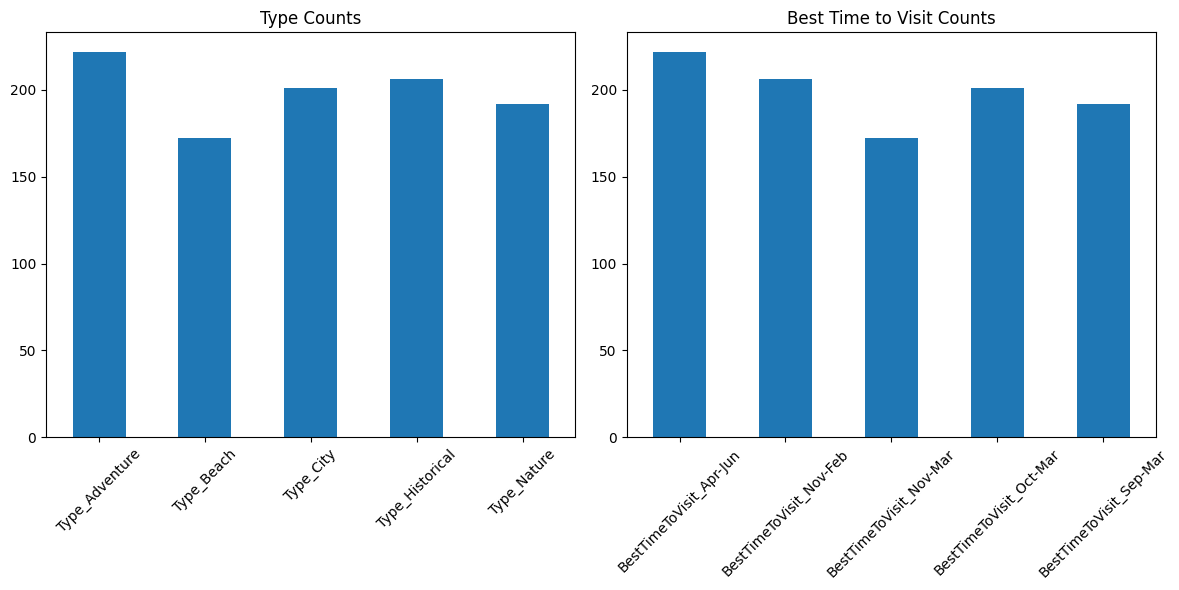

In [35]:
# 1. NUMERIC COLUMNS LIST
numeric_cols = [
    'Rating', 'Popularity', 'ExperienceRating',
    'NumberOfAdults', 'NumberOfChildren'
]

date_numeric = ['Year','Month','Day','DayOfWeek']

# 2. PLOT DISTRIBUTIONS (Histograms)

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 3. DATE-RELATED DISTRIBUTIONS

plt.figure(figsize=(12, 8))

for i, col in enumerate(date_numeric):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 4. SCATTER PLOTS (Simple Relationships)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['Popularity'], df['ExperienceRating'], alpha=0.5)
plt.title('Popularity vs ExperienceRating')
plt.xlabel('Popularity')
plt.ylabel('ExperienceRating')

plt.subplot(2, 2, 2)
plt.scatter(df['Rating'], df['ExperienceRating'], alpha=0.5)
plt.title('Rating vs ExperienceRating')
plt.xlabel('Rating')
plt.ylabel('ExperienceRating')

plt.subplot(2, 2, 3)
plt.scatter(df['Popularity'], df['Rating'], alpha=0.5)
plt.title('Popularity vs Rating')
plt.xlabel('Popularity')
plt.ylabel('Rating')

plt.subplot(2, 2, 4)
plt.scatter(df['NumberOfAdults'], df['ExperienceRating'], alpha=0.5)
plt.title('Adults vs ExperienceRating')
plt.xlabel('Adults')
plt.ylabel('ExperienceRating')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# Type Feature Count
plt.subplot(1, 2, 1)
type_cols = [c for c in df.columns if c.startswith("Type_")]
df[type_cols].sum().plot(kind='bar')
plt.title("Type Counts")
plt.xticks(rotation=45)

# Best Time to Visit Count
plt.subplot(1, 2, 2)
bt_cols = [c for c in df.columns if c.startswith("BestTimeToVisit_")]
df[bt_cols].sum().plot(kind='bar')
plt.title("Best Time to Visit Counts")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [36]:
df_raw=pd.read_csv("/content/final_df.csv")

In [38]:
df=df.drop(columns=['Name_Goa Beaches',"Name_Jaipur City",'Name_Kerala Backwaters','Name_Leh Ladakh','Name_Taj Mahal'])

In [41]:
df = pd.concat([df, df_raw["Name_x"]], axis=1)
df.head()

,ReviewID,DestinationID_x,UserID,Rating,Popularity,HistoryID,DestinationID_y,ExperienceRating,NumberOfAdults,NumberOfChildren,...,BestTimeToVisit_Apr-Jun,BestTimeToVisit_Nov-Feb,BestTimeToVisit_Nov-Mar,BestTimeToVisit_Oct-Mar,BestTimeToVisit_Sep-Mar,Year,Month,Day,DayOfWeek,Name_x
0,1,178,327,2,8.544352,79,175,3,1,1,...,False,False,False,True,False,2024,1,1,0,Jaipur City
1,2,411,783,1,8.284127,834,894,2,1,1,...,False,True,False,False,False,2024,3,20,2,Taj Mahal
2,4,358,959,3,7.738761,998,660,4,1,1,...,False,False,False,True,False,2024,2,15,3,Jaipur City
3,5,989,353,2,8.208088,202,894,5,2,0,...,False,False,False,False,True,2024,1,1,0,Kerala Backwaters
4,6,473,408,4,8.138558,331,403,2,2,0,...,False,False,False,True,False,2024,1,1,0,Jaipur City


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReviewID                 993 non-null    int64  
 1   DestinationID_x          993 non-null    int64  
 2   UserID                   993 non-null    int64  
 3   Rating                   993 non-null    int64  
 4   Popularity               993 non-null    float64
 5   HistoryID                993 non-null    int64  
 6   DestinationID_y          993 non-null    int64  
 7   ExperienceRating         993 non-null    int64  
 8   NumberOfAdults           993 non-null    int64  
 9   NumberOfChildren         993 non-null    int64  
 10  Type_Adventure           993 non-null    bool   
 11  Type_Beach               993 non-null    bool   
 12  Type_City                993 non-null    bool   
 13  Type_Historical          993 non-null    bool   
 14  Type_Nature              9

In [51]:
y = df["Name_x"]
# X = df.drop(["Name_x", "ReviewID", "DestinationID_x", "DestinationID_y", "UserID", "HistoryID"], axis=1)
X = df.drop(["Name_x"], axis=1)


In [52]:
X = X.astype(int)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)


In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                    precision    recall  f1-score   support

      Goa Beaches       1.00      1.00      1.00        34
      Jaipur City       1.00      1.00      1.00        41
Kerala Backwaters       1.00      1.00      1.00        38
       Leh Ladakh       1.00      1.00      1.00        50
        Taj Mahal       1.00      1.00      1.00        36

         accuracy                           1.00       199
        macro avg       1.00      1.00      1.00       199
     weighted avg       1.00      1.00      1.00       199



In [57]:
sample_input = {
    "ReviewID": 2001,
    "DestinationID_x": 5,
    "UserID": 122,
    "Rating": 4,
    "Popularity": 82.3,
    "HistoryID": 55,
    "DestinationID_y": 5,
    "ExperienceRating": 5,
    "NumberOfAdults": 2,
    "NumberOfChildren": 1,
    "Type_Adventure": 0,
    "Type_Beach": 1,
    "Type_City": 0,
    "Type_Historical": 0,
    "Type_Nature": 0,
    "BestTimeToVisit_Apr-Jun": 0,
    "BestTimeToVisit_Nov-Feb": 0,
    "BestTimeToVisit_Nov-Mar": 0,
    "BestTimeToVisit_Oct-Mar": 1,
    "BestTimeToVisit_Sep-Mar": 0,
    "Year": 2024,
    "Month": 1,
    "Day": 15,
    "DayOfWeek": 0
}
X_new = pd.DataFrame([sample_input])
X_new_scaled = scaler_std.transform(X_new)
knn.predict(X_new_scaled)


array(['Jaipur City'], dtype=object)

In [58]:
sample_input = {
    "ReviewID": 2002,
    "DestinationID_x": 5,
    "UserID": 124,
    "Rating": 4,
    "Popularity": 90,
    "HistoryID": 55,
    "DestinationID_y": 5,
    "ExperienceRating": 5,
    "NumberOfAdults": 2,
    "NumberOfChildren": 1,
    "Type_Adventure": 0,
    "Type_Beach": 0,
    "Type_City": 0,
    "Type_Historical": 0,
    "Type_Nature": 1,
    "BestTimeToVisit_Apr-Jun": 0,
    "BestTimeToVisit_Nov-Feb": 1,
    "BestTimeToVisit_Nov-Mar": 0,
    "BestTimeToVisit_Oct-Mar": 0,
    "BestTimeToVisit_Sep-Mar": 0,
    "Year": 2024,
    "Month": 1,
    "Day": 15,
    "DayOfWeek": 0
}
X_new = pd.DataFrame([sample_input])
X_new_scaled = scaler_std.transform(X_new)
knn.predict(X_new_scaled)

array(['Kerala Backwaters'], dtype=object)